## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명 : 모델 성능 평가
- 평가일 : 03.13
- 성명 : 이재우
- 점수 : 85

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

dt = DecisionTreeClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print('정확도: ',accuracy_score(y_test,pred))
print('오차행렬')
print(confusion_matrix(y_test,pred))

정확도:  0.9666666666666667
오차행렬
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


Q2. 타이타닉 분석용 데이터세트인 tdf1.pkl를 불러와서 생존자 예측 모델을 만든 후 오차행렬, 정확도, 재현율, f1, AUC를 포함하는 사용자 함수를 활용하여 평가하세요.
- test_size = 0.2, 분류기는 RandomForestClassifier 이용

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix,f1_score,roc_auc_score
import pandas as pd

def get_clf_evals(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬: \n',confusion)
    print('정확도: ',round(accuracy,4))
    print('정밀도: ',round(precision,4))
    print('재현율: ',round(recall,4))
    print('f1 score: ',round(f1,4))
    print('roc_auc: ',round(roc_auc,4))

tdf1 = pd.read_pickle('./dataset/tdf1.pkl')
X = tdf1.drop('Survived',axis = 1)
y = tdf1['Survived']

rf = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

rf.fit(X_train,y_train)

pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)[:,1]
get_clf_evals(y_test,pred,pred_proba)

오차행렬: 
 [[108  11]
 [ 23  37]]
정확도:  0.8101
정밀도:  0.7708
재현율:  0.6167
f1 score:  0.6852
roc_auc:  0.8238


Q3. Q2에서 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf,X,y,scoring = 'accuracy',cv = 5)
np.mean(scores)

0.7856631724311092

Q4. Q2에서 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[8,10,12], 'min_samples_leaf':[8,12,16], 'min_samples_split':[8,12,16]}

grid_cv = GridSearchCV(rf,param_grid = params,cv=2,n_jobs=-1)
grid_cv.fit(X_test,y_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.7653558052434457


In [30]:
rf1 = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_leaf = 8, min_samples_split = 8,random_state = 4)
rf1.fit(X_train,y_train)
pred = rf1.predict(X_test)
print(accuracy_score(y_test,pred))

0.8435754189944135


Q5 ~ Q7. 'dataset/diabetes.csv'을 불러와서 아래사항을 수행하세요.
- 피마 인디언 당뇨병 예측을 로지스틱 회귀를 이용하여 수행하고 사용자 함수를 작성하여 평가(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)
- 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 시각화 
- 재현율 기준의 성능을 개선하기 위하여 그 값이 0이 될 수 없는 각 칼럼을 탐색하여 적절한 처리를 한 후 로지스틱 회귀로 예측 및 평가 수행(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)


In [81]:
df = pd.read_csv('./dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# Q5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y_df = df['Outcome']
X_df = df.drop('Outcome',axis = 1)

X_train,X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.2,random_state = 10)

lr_clf = LogisticRegression(solver='liblinear',random_state = 10)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_evals(y_test,pred,pred_proba)

오차행렬: 
 [[87  8]
 [33 26]]
정확도:  0.7338
정밀도:  0.7647
재현율:  0.4407
f1 score:  0.5591
roc_auc:  0.8353


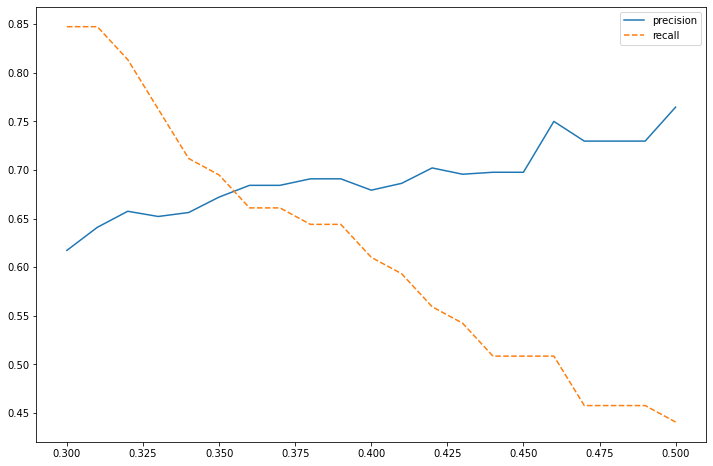

In [83]:
# Q6 
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
custom_thresholds = np.arange(30,51)*0.01
pred_proba_1 = pred_proba.reshape(-1,1)
prec_list = []
reca_list = []
for ct in custom_thresholds:
    binarizer = Binarizer(threshold = ct).fit(pred_proba_1)
    custom_predict=binarizer.transform(pred_proba_1)
    precision = precision_score(y_test,custom_predict)
    prec_list.append(precision)
    recall = recall_score(y_test,custom_predict)
    reca_list.append(recall)

plt.figure(figsize = (12,8))
plt.plot(custom_thresholds,prec_list,label = 'precision')
plt.plot(custom_thresholds,reca_list,ls = '--',label = 'recall')
plt.legend()
plt.show()

In [85]:
# Q7
df = pd.read_csv('./dataset/diabetes.csv')
df.SkinThickness=df.SkinThickness.replace(0,round(df.SkinThickness.mean(),2))
df.Insulin=df.Insulin.replace(0,round(df.Insulin.mean(),2))
display(df)
y_df = df['Outcome']
X_df = df.drop('Outcome',axis = 1)

X_train,X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.2,random_state = 10)

lr_clf = LogisticRegression(solver='liblinear',random_state = 10)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_evals(y_test,pred,pred_proba)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00,79.8,33.6,0.627,50,1
1,1,85,66,29.00,79.8,26.6,0.351,31,0
2,8,183,64,20.54,79.8,23.3,0.672,32,1
3,1,89,66,23.00,94.0,28.1,0.167,21,0
4,0,137,40,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00,180.0,32.9,0.171,63,0
764,2,122,70,27.00,79.8,36.8,0.340,27,0
765,5,121,72,23.00,112.0,26.2,0.245,30,0
766,1,126,60,20.54,79.8,30.1,0.349,47,1


오차행렬: 
 [[87  8]
 [33 26]]
정확도:  0.7338
정밀도:  0.7647
재현율:  0.4407
f1 score:  0.5591
roc_auc:  0.8359


Q8. "dataset/auto-mpg.xlsx"을 불러와서 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [70]:
ndf = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf.horsepower[ndf['horsepower'] == '?']= np.nan
ndf.horsepower = ndf.horsepower.astype('float')
ndf.dropna(subset = ['horsepower'],axis = 0,inplace = True)
ndf.drop('car name',axis = 1,inplace = True)
ndf

C:\Users\Master\AppData\Local\Temp/ipykernel_36264/2001853069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.horsepower[ndf['horsepower'] == '?']= np.nan


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
X = ndf.drop('mpg',axis = 1)
y= ndf['mpg']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 11)
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print('rmse',round(rmse,4),'R2',round(r_square,4))

rmse 3.7327 R2 0.7956


Q9. 'load_boston' 을 불러와서 cross_val_score를 이용한 cv=5인 교차검증을 수행 후 MSE, RMSE를 출력하세요.(LineaRegression) 

In [69]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

boston = load_boston()

X = boston.data
y = boston.target

lr = LinearRegression()

nmse = cross_val_score(lr,X,y,scoring = 'neg_mean_squared_error',cv = 5)

mse  = nmse*(-1)
rmse = np.sqrt(mse)

for i in range(len(mse)):
    print(i+1,'번째 검증','mse',round(mse[i],4),'rmse',round(rmse[i],4))

1 번째 검증 mse 12.4603 rmse 3.5299
2 번째 검증 mse 26.0486 rmse 5.1038
3 번째 검증 mse 33.0741 rmse 5.751
4 번째 검증 mse 80.7624 rmse 8.9868
5 번째 검증 mse 33.3136 rmse 5.7718


Q10. 'Q9에 대하여 R2 Score를 구하세요.(k=5) 

In [74]:
r2 = cross_val_score(lr,X,y,scoring = 'r2',cv = 5)
for i in range(len(r2)):
    print(i+1,'번째 검증','r2',round(r2[i],4))

1 번째 검증 r2 0.5569
2 번째 검증 r2 0.6895
3 번째 검증 r2 0.8221
4 번째 검증 r2 0.6795
5 번째 검증 r2 0.2251
